In [1]:
import torch
from utils import Args
from train import Training

# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [16,64,128,256]
B = [20,64,128,256]
L = [4,12,18,24]
h = [4,8,12,16]
d = [32,128,256,768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4,1e-3,1e-2,1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1,10,20,30]

#### Define Args list

In [3]:
args = Args(
    N[0],B[0],L[0],h[0],d[0],
    use_lr_decay[0],learning_rate[0],
    datasets_paths[0],max_iterations[0],
    out_dir=out_dir, val_int=30)

#### Train models

In [4]:
training = Training(args)
model, losses = training.train_model()
print(losses.keys())
print(losses['validation'])

./datasets/shakespear_corpus.txt
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
1003843 20
1003843 20
./datasets/shakespear_corpus.txt
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
111538 20
111538 20
1003843 20
1003843 20
111538 20
111538 20
Epoch: 0, Batch 29, Training Loss: 4.2958, Validation Loss: 4.2550
111538 20
111538 20
Epoch: 0, Batch 59, Training Loss: 4.1836, Validation Loss: 4.1326
111538 20
111538 20
Epoch: 0, Batch 89, Training Loss: 4.0269, Validation Loss: 3.9604
dict_keys(['train', 'validation'])
[4.254977703094482, 4.132628440856934, 3.960374116897583]


#### Cross validation

In [5]:
training_cross = Training(args)
models, train_loss, val_loss = training_cross.cross_validation(k_fold=5)

---------------------------------
Fold n°0
./datasets/shakespear_corpus.txt
train indices: [0,0),[111538,1115381), test indices: [0,111538)
1003843 20
1003843 20
./datasets/shakespear_corpus.txt
train indices: [0,0),[111538,1115381), test indices: [0,111538)
111538 20
111538 20
1003843 20
1003843 20
111538 20
111538 20
Epoch: 0, Batch 29, Training Loss: 4.2085, Validation Loss: 4.2111
111538 20
111538 20
Epoch: 0, Batch 59, Training Loss: 4.1227, Validation Loss: 4.0847
111538 20
111538 20
Epoch: 0, Batch 89, Training Loss: 3.9374, Validation Loss: 3.9114
---------------------------------
Fold n°1
./datasets/shakespear_corpus.txt
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
1003843 20
1003843 20
./datasets/shakespear_corpus.txt
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
111538 20
111538 20
1003843 20
1003843 20
111538 20
111538 20
Epoch: 0, Batch 29, Training Loss: 4.2802, Validation Loss: 4.3151
111538 20
111538 20
Epoch: 0, 

#### Results

In [6]:
print(train_loss.size()) # 5 folds, 100 grad updates e.g. 5 x 100 matrix.
print(val_loss.size())   # 5 folds, log every 100 grad updates e.g. 5 x 1 matrix
print(val_loss)

torch.Size([5, 100])
torch.Size([5, 3])
tensor([[4.2111, 4.0847, 3.9114],
        [4.3151, 4.1941, 4.0145],
        [4.2251, 4.1189, 3.9725],
        [4.3888, 4.2541, 4.0586],
        [4.2522, 4.1329, 3.9569]])


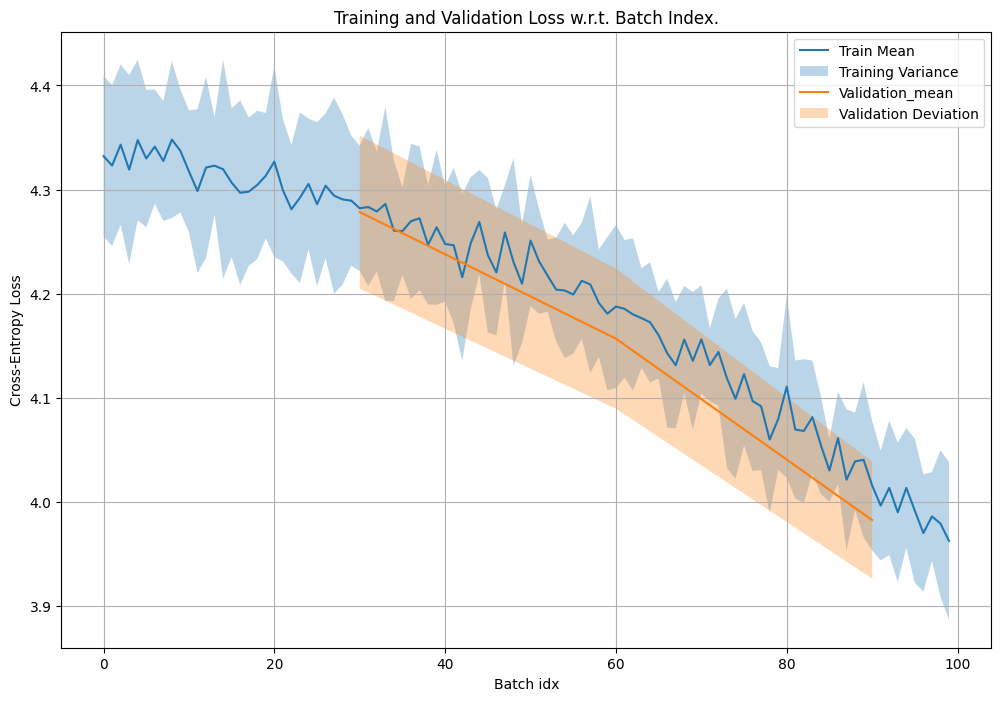

In [7]:
training_cross.losses_graph()

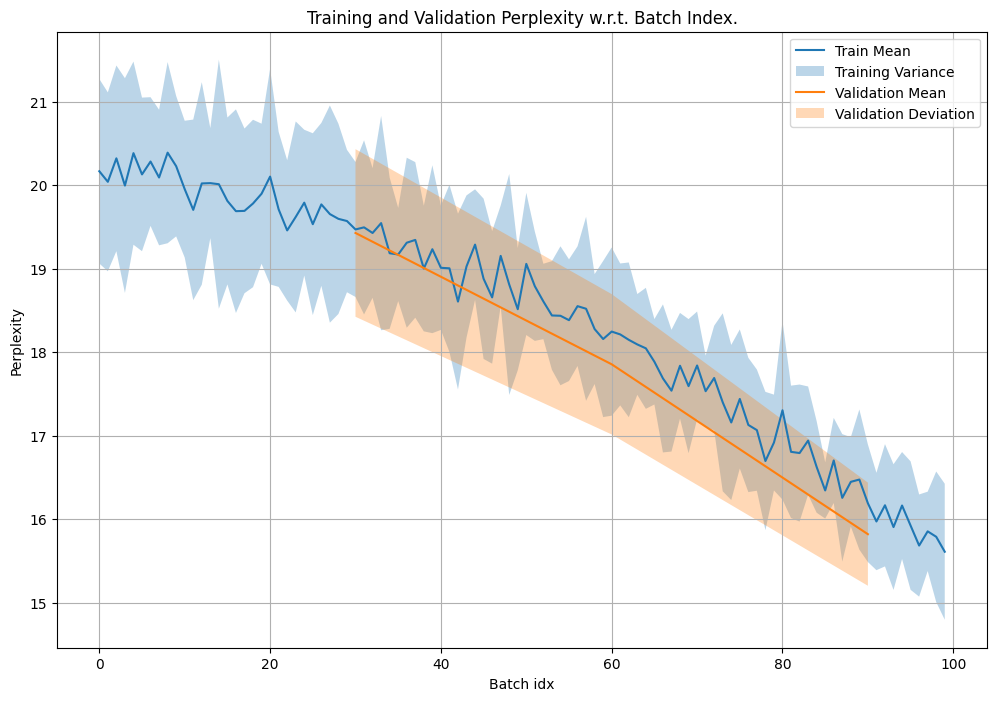

In [8]:
training_cross.perplexity_graph()